# Linear Regression
### In This Notebook
In this notebook we look at: 
- importing data using the ***Pandas*** library,
- creating a scatter plot of the data using the ***MatPlotLib*** library,
- uisng the ***SciPy*** library to fit curves to the data, and 
- use ***Numpy*** to achieve the same results with linear algebra.

All the examples use a set of data that contains the amount of alcohol in servings of various drinks.

### Your Assignment:
For your part you need to
- read carefully through the material that is here,
- find another data set that you are interested in,
- create a new Jupyter Notebook, and
- using your data, show that you can
  - import the data,
  - plot the data on a scatter plot,
  - use SciPy to fit linear ($y=ax+b$), quadratic ($y=ax^2+bx+c$), and basic exponential models ($y=be^{ax}$), and
  - repeat the curve fitting with linear algebra and Numpy, verifying that you get the same results.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import linalg as la
from scipy.optimize import curve_fit

# Import and Create Basic Plot of Data

## Import Data

In [2]:
# Here we import the data and assign each column of values to a variable:
# Notice that as columsn are assigned they are made Numpy arrays
df = pd.read_csv('../data/alcohol_calories.csv')
t = np.array(df['Alcohol'])
oz = np.array(df['oz'])
cal = np.array(df['calories'])
# This calculation creates a Numpy array of calories per oz
cal_per_ounce = cal/oz

In [3]:
for drink,cals in zip(t,cal_per_ounce):
    print("A %s has %0.2f calories per ounce"%(drink,cals))

A Beer (light) has 8.58 calories per ounce
A Beer (regular) has 12.75 calories per ounce
A Beer (higher alcohol, craft beers) has 21.67 calories per ounce
A Gin (80 proof) has 64.67 calories per ounce
A Gin (94 proof) has 77.33 calories per ounce
A Rum (80 proof) has 64.67 calories per ounce
A Rum (94 proof) has 77.33 calories per ounce
A Vodka (80 proof) has 64.67 calories per ounce
A Vodka (94 proof) has 77.33 calories per ounce
A Whiskey (80 proof) has 64.67 calories per ounce
A Whiskey (94 proof) has 77.33 calories per ounce
A Coffee liqueur has 106.67 calories per ounce
A Coffee liqueur with cream has 102.67 calories per ounce
A Crème de menthe has 124.00 calories per ounce
A Bloody Mary has 26.67 calories per ounce
A Chocolate martini has 167.20 calories per ounce
A Cosmopolitan has 53.09 calories per ounce
A Daiquiri has 49.82 calories per ounce
A Highball has 13.75 calories per ounce
A Hot buttered rum has 36.50 calories per ounce
A Mai Tai has 61.20 calories per ounce
A Margar

## Create Scatter Plot

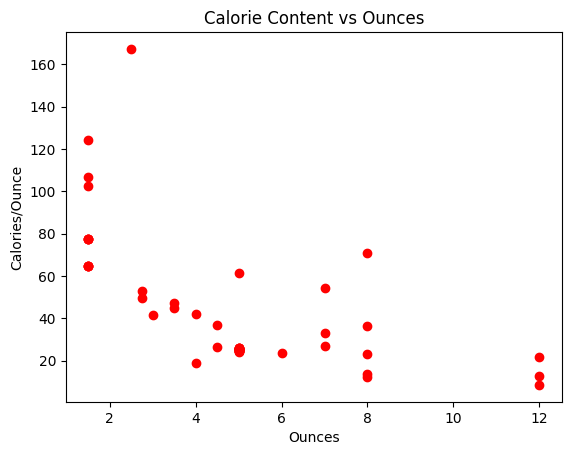

In [4]:
fig,ax = plt.subplots();
scatt_plot = ax.plot(oz,cal_per_ounce,"ro");
ax.set_title("Calorie Content vs Ounces");
ax.set_xlabel('Ounces');
ax.set_ylabel('Calories/Ounce');

# Use SciPy Library to Fit Curves

## Use Scipy to Fit Data to a Curve

In [5]:
# These create function representing arbitray linear and quadratic functions
def arb_linear(x,a,b): return a*x+b
def arb_quad(x,a,b,c): return a*x**2+b*x+c

# try to un comment and complete this function for an arbitray exponential y=b*e^(ax)
# def arb_exp(x,a,b): return ???

In [6]:
lcoef,lcovar=curve_fit(arb_linear, oz, cal_per_ounce)
qcoef,qcovar=curve_fit(arb_quad, oz, cal_per_ounce)

# how would you use the arbitrary exponential function you created to get coefficients?
# ecoef,ecovar=curve_fit(???)


## Add Curves to the Scatter Plot

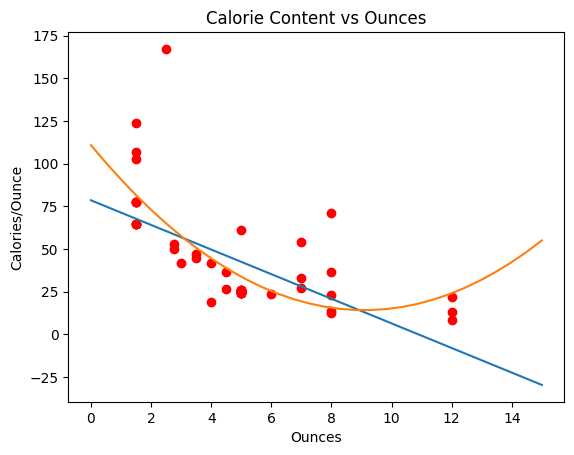

In [7]:
x=np.linspace(0,15,30)
line_approx = ax.plot(x,lcoef[0]*x+lcoef[1]);
quad_approx = ax.plot(x,qcoef[0]*x**2+qcoef[1]*x+qcoef[2]);
# add your exponential curve
# exp_approx = ???
fig

# Repeat with Linear Algebra

## First the Linear Approximation

In [8]:
# Create a matrix of x values and ones for the constant term
r, = oz.shape
A = np.column_stack([oz,np.ones(r)])

In [9]:
# Calculate A^TA for regression
M = A.transpose()@A

In [10]:
# Find the inverse of A^TA
Minv = la.inv(M)

In [11]:
# The coefficeints are (A^TA)^-1A^Tb where b is the vector of y values
Minv@A.transpose()@cal_per_ounce

array([-7.21347546, 78.48637416])

In [12]:
# We can see that our result matches SciPy's output
lcoef

array([-7.21347546, 78.48637416])

## Then a Quadratic Approximation

In [13]:
# We can repeat the above stpes, with a slightly differnt matrix, to get 
# coefficients for a quadratic approximation
B = np.column_stack([oz**2,oz,np.ones(r)])
N = B.transpose()@B
Ninv = la.inv(N)
Ninv@B.transpose()@cal_per_ounce

array([  1.17012957, -21.27455405, 110.80080593])

In [14]:
# Again the results match SciPy
qcoef

array([  1.17012959, -21.27455427, 110.80080652])

## Mystery Curve

What type of general curve is being fit to the data in this example?

In [32]:
a, lnb = Minv@A.transpose()@np.log(cal_per_ounce)
b = np.e**lnb

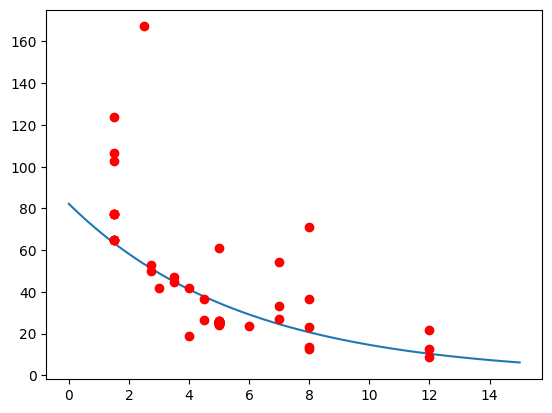

In [33]:
X = np.linspace(0,15)
plt.plot(X,b*np.e**(a*X),oz,cal_per_ounce,"ro");
plt.show()